# Лабораторная работа №1: Моделирование стандартных дискретных сигналов

Выполнили студенты гр. 9383 Рыбников Роман и Сергиенкова Анастасия. Вариант №9

## Цель работы


Изучить математическое описание стандартных дискретных сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения

$\bullet \textbf{Дискретный сигнал - }$ это сигнал, дискретный по времени и непрерывный по состоняию (уровню), который описывается последовательностью чисел бесконечной разрядности $x(nT)$ или $x(n)$. Значения $nT,n \in \mathbb Z$ называют дискретным временем, где $T$ - период дискретизации, $n$ - дискретным нормированным временем.

Термины "дискретный сигнал" и "последовательность" отождествляются.

$\bullet \textbf{Цифровой сигнал - }$ это сигнал, дискретный по времени и квантованный по состоянию (уровню), который описывается последовательностью чисел конечной разрядности - квантованной последовательностью $\displaystyle \tilde x(nT)$ или $\displaystyle \tilde x(n)$. 

## Постановка задачи

С помощью программных средств провести моделирование и анализ стандартных дискретных последовательностей. Результаты подкрепить соответствующими графиками и выводами.

## Порядок выполнения работы:

1. Смоделировать единичный цифровой импульс $\delta_d(k)$ с выводом графиков на интервале дискретного времени $nT \in \Big[0, \big(N-1\big)T\Big]$ и дискретного нормированного вермени $n\in \big[0,N-1\big]$. Пояснить:
    
        a. взаимосвязь между дискретным и дискретным нормированным временем;
        b. различие между единичным цифровым импульсом и дельта-функцией

2. Смоделировать дискретный единичный скачок $\sigma_d(k)$ с выводом графиков на интервале дискретного времени $nT \in \Big[0, \big(N-1\big)T\Big]$ и дискретного нормированного времени $n\in \big[0,N-1\big]$. Пояснить:

        a. соответствие между дискретным и аналоговым единичными скачками;
        b. чему равна частота дискретизации дискретного единичного скачка.
        
3. Смоделировать дискретную экспоненциальную функцию $s_1(k)$ с выводом графиков на интервале дискретного времени $nT \in \Big[0, \big(N-1\big)T\Big]$ и дискретного нормированного времени $n\in \big[0,N-1\big]$.


4. Смоделировать дискретный комплексный гармонический сигнал $s_2(k) = C\cdot exp(j \cdot\hat\omega_0\cdot k)$ с выводом графиков вещественной и мнимой частей на интервале времени $n\in \big[0,N-1\big]$. Записать данный сигнал в виде комбинации двух вещественных последовательностей.


5. Вывести графики последовательностей $\delta_d(k)\text{, } \sigma_d(k)\text{ и }s_1(k)$, задержанных на $m$ отсчетов, на интервале времени $n\in \big[0,N-1\big]$. Записать формулы задержанных последовательностей.


6. Сделать выводы.

In [1]:
import math
import numpy as np
from math import pi

import matplotlib.pyplot as plt

In [2]:
# Номер бригады
Nb = 9

# Длина последовательности
N = 30 + Nb % 5

# Период дискретизации
T = 0.0005*(1 + Nb % 3)

# Основание экспоненты
a = pow(-1, Nb) * (0.8 + 0.005 * Nb)

# Амплитуда гармонического сигнала
C = 1 + Nb % 5

# Частота гармонического сигнала
w0 = pi / (6  + Nb % 5)

# Задержка
m = 5 + Nb % 5

In [3]:
x_ = np.linspace(0, (N - 1)*T)
x_norm = np.linspace(0, (N - 1), N)

## Пункт 1

Смоделируем единичный цифровой импульс 

$$\delta_d(k)= 
\begin{cases}
    \displaystyle 1,       & \quad k = 0\\
    0  & \quad k \neq 0
  \end{cases}$$

In [4]:
def delta_d(x, m=0):
    y = np.zeros(x.shape)
    y[x == m] = 1
    return y

Построим графики этого импульса на заданных в условии интервалах.

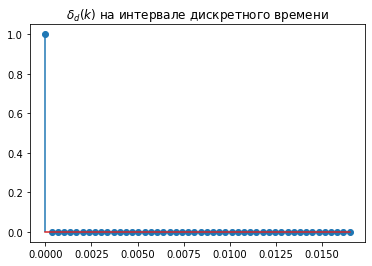

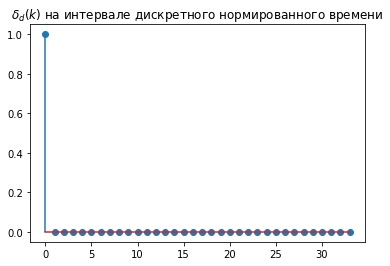

In [5]:
plt.stem(x_, delta_d(x_))
plt.title(r'$\delta_d(k)$ на интервале дискретного времени')
plt.show()
plt.stem(x_norm, delta_d(x_norm))
plt.title(r'$\delta_d(k)$ на интервале дискретного нормированного времени')
plt.show()

$\bullet$ Связь дискретного и дискретного номированного времени заключается в том, что в дискретном нормированном времени $ n - $ это дискретное время $nT$ с периодом дискретизации $T=1$

$\bullet$ Различие между цифровым единичным импульсом и функцией Дирака: у единичного импульса амплитуда равна единице, у функции Дирака равна бесконечности. Поэтому функция Дирака на практике не реализуема, а также является бесконечно узкой, имя плозадь равной единице.

## Пункт 2

Смоделируем дискретный единый скачок

$$\sigma_d(k)=
\begin{cases}
    \displaystyle 1,       & \quad k \geq 0\\
    0  & \quad k < 0
  \end{cases}$$

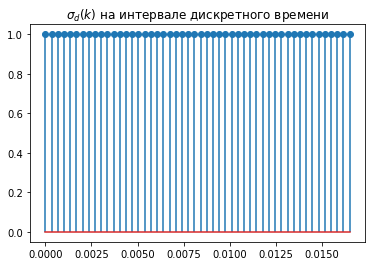

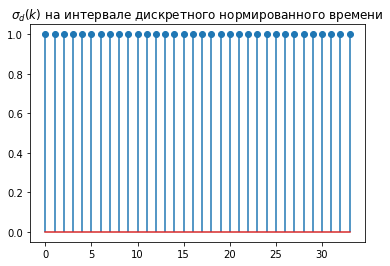

In [6]:
plt.stem(x_, np.heaviside(x_, 1))
plt.title(r'$\sigma_d(k)$ на интервале дискретного времени')
plt.show()
plt.stem(x_norm, np.heaviside(x_norm, 1))
plt.title(r'$\sigma_d(k)$ на интервале дискретного нормированного времени')
plt.show()

$\bullet$ Соответствие между цифровы и аналоговым единичными скачками заключается в том, что первый получается путём дискретизации второго.

$\bullet$ Аналоговый сигнал в реальности можно приближённо представить некоторой суммой единичных скачков, которые возникают в последовательные моменты времени. Если длительность интервала времени между единичными скачками устремить к нулю, то в пределе будет получаться точная огибающая реального исходного сигнала

$\bullet$ Частота дискретизации дискретного единичного скачка равна:

$$f_d \geq 2\cdot f_d$$

, где $f_d -$ верхняя граница частоты спектра аналогового сигнала. 

In [7]:
1/T

2000.0

$$f_d = 2000.0$$

## Пункт 3

Смоделируем дискретную экспоненциальную функцию 

$$ \displaystyle s_1(k,T)= 
\begin{cases}
    \displaystyle a^k,       & \quad k \geq 0\\
    0  & \quad k < 0
  \end{cases}$$
  


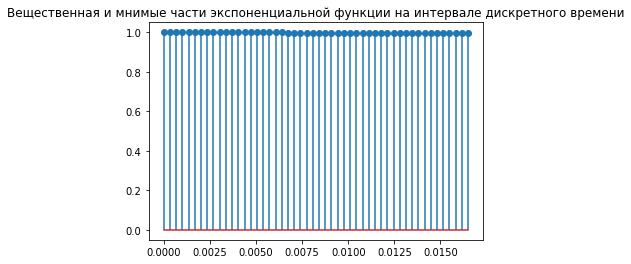

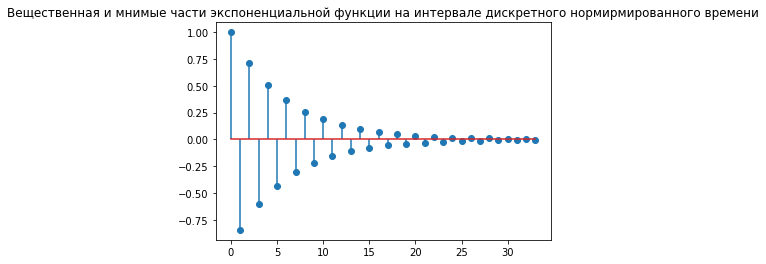

In [8]:
def e1_real(x, m=0):
    y = np.zeros(x.shape)
    temp = np.float_power(a + 0j, x[x >= m] - m)
    y[x >= m] = temp.real
    return y

def e1_imag(x, m=0):
    y = np.zeros(x.shape)
    temp = np.float_power(a + 0j, x[x >= m] - m)
    y[x >= m] = temp.imag
    return y

plt.stem(x_, e1_real(x_))
plt.title('Вещественная и мнимые части экспоненциальной функции на интервале дискретного времени')
plt.show()
plt.stem(x_norm, e1_real(x_norm))
plt.title('Вещественная и мнимые части экспоненциальной функции на интервале дискретного нормирмированного времени')
plt.show()

Соответсвие между дискретной и аналоговой экспонентами: точки дискретной находятся в местах, где для аналоговой экспоненты $a^k,k \in \mathbb Z$ 

Дискретная экспонента (экспоненицальная последовательность) образуется в результате дискретизации экспоненты.

## Пункт 4

Смоделируем дискретный комплексный гармонический сигнал $$\displaystyle s_2(k) = C\cdot exp(j \cdot\hat\omega_0\cdot k)$$

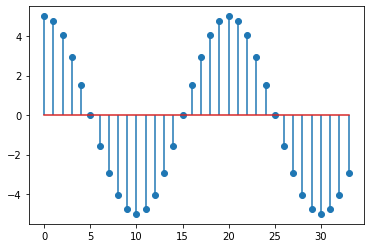

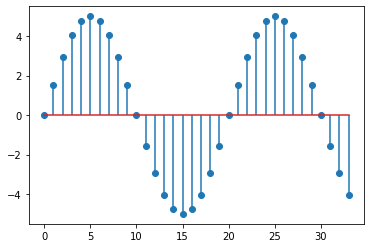

In [9]:
def e2_real(x):
    return (C * np.exp(1j * w0 * x)).real


def e2_imag(x):
    return (C * np.exp(1j * w0 * x)).imag

plt.stem(x_norm, e2_real(x_norm))
plt.show()

plt.stem(x_norm, e2_imag(x_norm))
plt.show()

Записать данного сигнала в виде комбинации двух вещественных последовательностей:

$$\displaystyle Re\big(x(k)\big)=C\cdot cos(w\cdot T\cdot k) \\ Im\big(x(k)\big) = C \cdot sin(w \cdot T \cdot k)$$

## Пункт 5


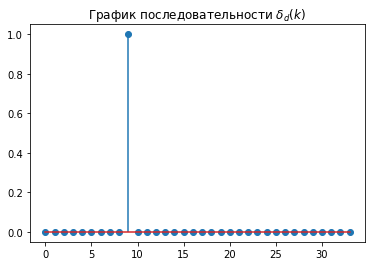

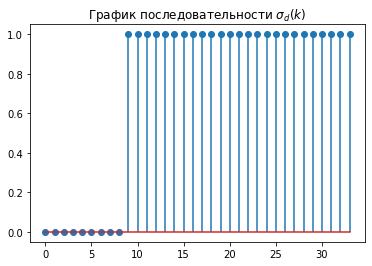

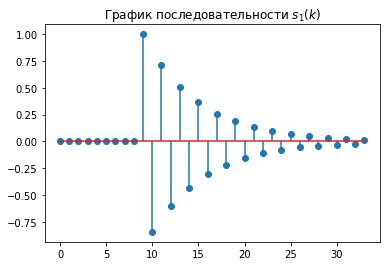

In [10]:
plt.stem(x_norm, delta_d(x_norm, m))
plt.title(r'График последовательности $\delta_d(k)$')
plt.show()

plt.stem(x_norm, np.heaviside(x_norm - m, 1))
plt.title(r'График последовательности $\sigma_d(k)$')
plt.show()

plt.stem(x_norm, e1_real(x_norm, m))
plt.title(r'График последовательности $s_1(k)$')
plt.show()

Выпишем формулы задержанных последовательностей:

$\bullet \textbf{Формула единичного импульса:}$
$$\displaystyle \delta_d(k-m) = 
\begin{cases}
    \displaystyle 1,       & \quad k = m\\
    0  & \quad k \neq m
  \end{cases}$$
  
$\bullet \textbf{Формула единичного скачка:}$
$$\displaystyle\sigma_d(k-m)=
\begin{cases}
    \displaystyle 1,       & \quad k \geq m\\
    0  & \quad k < m
  \end{cases}$$

$\bullet \textbf{Дискретной экспоненицальной функции:}$

$$\displaystyle s_1(k - m)= 
\begin{cases}
    \displaystyle a^{k-m},       & \quad k \geq m\\
    0  & \quad k < m
  \end{cases}$$


## Вывод

В процессе выполнения лабораторной работы были изучены математически описания дискретных сигналов. Были получены навыки использования программных средств для моделирования сигналов. В ходе работы были смоделированы различные дискретные сигналы, а также построены их графики